```{contents}
```

## Vision-Language Models (VLMs)

A **Vision-Language Model (VLM)** is an AI system that can **understand both images AND text**, and can **connect them together**.

In simple words:

> **A VLM can look at an image, read text, and reason about both together.**

Examples of VLM tasks:

* Describe an image (“captioning”)
* Answer questions about an image (VQA)
* Understand charts, documents, tables
* Classify or search images using text
* Text → Image generation (used in diffusion models)
* Multimodal assistants (Gemini, GPT-4o, Claude 3, LLaVA)

---

### Why VLMs Matter

Humans understand the world using **vision + language together**.

VLMs allow AI to:

* See images
* Read text
* Combine meaning across modalities

This leads to rich applications like:

* AI assistants that analyze screenshots
* Chatbots that understand images
* OCR reasoning
* Autonomous driving vision
* Medical image question answering
* Multimodal RAG
* Text-to-image generation (Stable Diffusion, DALL·E)

---

### Intuition Behind VLMs

A Vision-Language Model learns:

> **“What things LOOK like” + “What things MEAN in language.”**

They connect:

* Visual features
* Text semantics

And learn **joint understanding**.

---

### How Vision–Language Models Work (Architecture)

VLMs combine **two encoders**:

#### Vision Encoder

Examples:

* Vision Transformer (ViT)
* ConvNet
* CLIP-Vision
* SigLIP

Converts an image → a vector embedding.

#### Text Encoder

Examples:

* BERT
* GPT-style
* CLIP text encoder
* LLaMA / Mistral fine-tuned adapters

Converts text → an embedding.

#### Fusion Layer

Combines the image + text representations.

Common fusion mechanisms:

* Cross-attention
* Concatenation
* Gated attention
* Projection into a shared space

#### Task Head

Based on what the model is designed for:

* Image captioning decoder
* VQA head
* Contrastive scoring (CLIP style)
* Multimodal GPT decoder

---

### Different Types of Vision–Language Models

#### **Contrastive VLMs (CLIP, SigLIP)**

Goal: match images ↔ texts
Used for:

* zero-shot classification
* image retrieval
* prompt-guided embeddings

#### **Generative VLMs (LLaVA, Kosmos-2, GPT-4V, Claude 3)**

Goal: generate language from images
Used for:

* VQA
* reasoning over images
* multimodal chat

These models take:

* image
* text prompt
* generate text output

#### **Multimodal LLMs**

Example: GPT-4o, Gemini 1.5 Pro
Unified vision + audio + text.

#### **Text-to-Image Models (DALL·E, Stable Diffusion)**

Use CLIP text encoder + diffusion model for image generation.

---

### Example Pipeline (Conceptual)

#### Input:

Image: A dog playing with a ball
Text Query: “What is the dog doing?”

#### Steps:

1. Vision Encoder → image embedding
2. Text Encoder → text embedding
3. Fusion Layer → cross-attention
4. Decoder → “The dog is playing with a ball.”

---

### Why Vision-Language Models Work

#### ✔ They learn alignment

Image concept ↔ Text description
(e.g., “dog”, “puppy”, “pets”, “ball” are connected)

#### ✔ They learn semantics

Not just pixel patterns—actual meaning.

#### ✔ They generalize

Can describe new things never seen in labels.

---

### Building Blocks in VLMs

| Component                   | Role                                     |
| --------------------------- | ---------------------------------------- |
| **ViT**                     | Encodes images into tokens               |
| **LLM (LLaMA/Mistral/GPT)** | Understands/generates language           |
| **Projection Layer**        | Aligns image tokens with LLM token space |
| **Cross-Attention**         | Lets LLM attend to image features        |
| **Decoder**                 | Produces captions or answers             |

This is the architecture used in **LLaVA, MiniGPT-4, Qwen-VL, Phi-3-Vision**, etc.

---

**Simple Pseudocode for a VLM**

```python
image_feat = vision_encoder(image)
text_feat = text_encoder(text)

# align image embedding to LLM space
projected = projection_layer(image_feat)

# fuse with text encoding
fused = cross_attention(text_feat, projected)

# generate answer
output = language_decoder(fused)
```

---

**One-Sentence Summary**

**Vision–Language Models combine an image encoder and a text encoder so that AI can see images, understand text, and reason across both together.**

In [1]:
!pip install transformers accelerate pillow torch torchvision


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load BLIP image captioning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Load any image
image = Image.open("dog.jpg")

# Prepare inputs
inputs = processor(image, return_tensors="pt")

# Generate caption
output = model.generate(**inputs, max_new_tokens=50)

print(processor.decode(output[0], skip_special_tokens=True))


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

c:\Users\sangouda\python_apps\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sangouda\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

there are two dogs sitting in the grass with flowers in the background


(-0.5, 5183.5, 3887.5, -0.5)

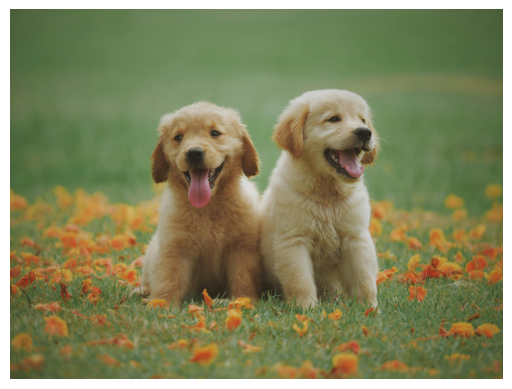

In [6]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# DataFrame containing image file paths
# df = pd.DataFrame({
#     "image_path": ["dog.jpg", "cat.jpg"]
# })

# Open first image
img = Image.open("dog.jpg")

# Display the image
plt.imshow(img)
plt.axis("off")
